In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Selected stats

In [2]:
df = pd.read_pickle("../Datasets/matches_full.pkl")
df.head()

,date,comp,round,venue,result,gf,ga,opponent,xg,xga,...,crspa_average_opponent,tkl_average_opponent,tklw_average_opponent,blocks_average_opponent,int_average_opponent,clr_average_opponent,touches_average_opponent,att_y_average_opponent,succ_average_opponent,succ%_average_opponent
0,2019-09-20,Bundesliga,Matchweek 5,Away,L,1.0,2.0,Schalke 04,0.8,1.0,...,1.75,20.00,13.75,14.50,11.75,18.00,567.25,13.50,8.25,63.775
1,2019-09-20,Bundesliga,Matchweek 5,Home,W,2.0,1.0,Mainz 05,1.0,0.8,...,1.50,17.75,11.25,11.25,11.50,21.50,528.75,15.25,7.75,49.675
2,2019-09-21,Bundesliga,Matchweek 5,Away,D,1.0,1.0,Freiburg,1.0,1.3,...,2.00,14.75,8.25,11.75,6.50,19.25,505.00,16.00,9.50,59.925
3,2019-09-21,Bundesliga,Matchweek 5,Home,L,0.0,3.0,RB Leipzig,0.7,1.5,...,1.25,19.75,11.50,11.75,13.50,26.00,632.75,18.25,12.00,65.650
4,2019-09-21,Bundesliga,Matchweek 5,Away,W,3.0,0.0,Werder Bremen,1.5,0.7,...,1.25,11.50,8.00,7.00,5.75,15.75,650.00,9.50,6.00,63.825


In [3]:
df.shape

(2706, 145)

In [4]:
# train test
train = df.loc[:int(df.shape[0]*0.7)]
test = df.loc[int(df.shape[0]*0.7)+1:]

In [5]:
# selected stats from team
selected_stats_from_team = ['gf_average', 'ga_average', 'poss_average', 'sot%_average', 'saves_average', 
                  'stp_average', '#opa_average', 'kp_average', 'crspa_average', 
                  'tkl_average', 'blocks_average', 'int_average', 'att_y_average', 
                            'succ%_average', 'venue_encoded', 'team_encoded']

In [6]:
# select stats
selected_stats_from_opponent = [f"{stat}_opponent" for stat in selected_stats_from_team]
predictors = selected_stats_from_team + selected_stats_from_opponent
predictors.remove('venue_encoded_opponent')
predictors

['gf_average',
 'ga_average',
 'poss_average',
 'sot%_average',
 'saves_average',
 'stp_average',
 '#opa_average',
 'kp_average',
 'crspa_average',
 'tkl_average',
 'blocks_average',
 'int_average',
 'att_y_average',
 'succ%_average',
 'venue_encoded',
 'team_encoded',
 'gf_average_opponent',
 'ga_average_opponent',
 'poss_average_opponent',
 'sot%_average_opponent',
 'saves_average_opponent',
 'stp_average_opponent',
 '#opa_average_opponent',
 'kp_average_opponent',
 'crspa_average_opponent',
 'tkl_average_opponent',
 'blocks_average_opponent',
 'int_average_opponent',
 'att_y_average_opponent',
 'succ%_average_opponent',
 'team_encoded_opponent']

# GridsearchCV

In [7]:
rf = RandomForestClassifier()
parameters = {'n_estimators':[50,100,200,300], 'min_samples_split':[2, 5, 10, 15, 20], 'max_features':['sqrt', 'log2', None]}

In [8]:
clf = GridSearchCV(rf, param_grid=parameters)
clf.fit(train[predictors], train['result_encoded'])

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 300]})

In [9]:
# best paragrams
clf.best_params_

{'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 200}

In [10]:
# best score
clf.best_score_

0.49868073878627966

In [11]:
# the rows with rank 1
pd.DataFrame(clf.cv_results_)[pd.DataFrame(clf.cv_results_)['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,1.655861,0.062637,0.040839,0.013371,sqrt,20,200,"{'max_features': 'sqrt', 'min_samples_split': ...",0.522427,0.556728,0.496042,0.469657,0.448549,0.498681,0.038199,1


# Evaluation

In [17]:
# check accuracy
rf = RandomForestClassifier(n_estimators=200, min_samples_split=20)
rf.fit(train[predictors], train['result_encoded'])

prob_preds = rf.predict_proba(test[predictors])
preds = rf.predict(test[predictors])

print("Accuracy on test set", accuracy_score(test['result_encoded'], preds))

preds_on_training = rf.predict(train[predictors])
print("Accuracy on training set", accuracy_score(train['result_encoded'], preds_on_training))

Accuracy on test set 0.5351418002466092
Accuracy on training set 0.9308707124010555


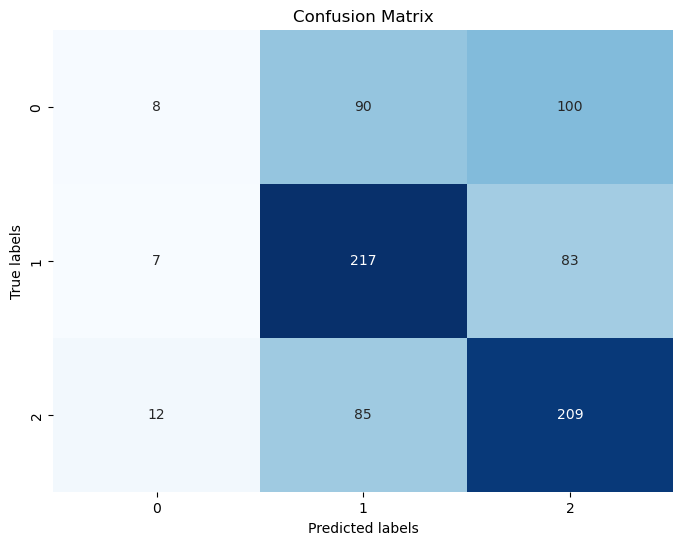

In [18]:
# confusion matrix
cm = confusion_matrix(test['result_encoded'], preds)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

- Win = 2
- Draw = 0
- Lose = 1

In [19]:
metrics = [precision_score, recall_score, f1_score]
averages = ['micro', 'macro', 'weighted']

for metric in metrics:
    for average in averages:
        name = metric.__name__.replace("_score","")
        print(f"{name} of the model with average = {average}:",  metric(test['result_encoded'], preds, average=average), "\n")

precision of the model with average = micro: 0.5351418002466092 

precision of the model with average = macro: 0.4610103300579491 

precision of the model with average = weighted: 0.4830592532944127 

recall of the model with average = micro: 0.5351418002466092 

recall of the model with average = macro: 0.47675032241041054 

recall of the model with average = weighted: 0.5351418002466092 

f1 of the model with average = micro: 0.5351418002466092 

f1 of the model with average = macro: 0.43028398690265207 

f1 of the model with average = weighted: 0.47834967565725856 



# features importance

In [20]:
# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [21]:
print("Feature ranking:")
for f in range(train[predictors].shape[1]):
    print(f"{f + 1}. {predictors[f]} ({importances[indices[f]]})")

Feature ranking:
1. gf_average (0.06141765877128059)
2. ga_average (0.05925460736488213)
3. poss_average (0.041171373708106536)
4. sot%_average (0.04082964041498697)
5. saves_average (0.040117988916307294)
6. stp_average (0.039171768724785144)
7. #opa_average (0.0383021075500802)
8. kp_average (0.03829312657795671)
9. crspa_average (0.03747270060330711)
10. tkl_average (0.03744028343727566)
11. blocks_average (0.03559977134229823)
12. int_average (0.03432674464967807)
13. att_y_average (0.03406157124085382)
14. succ%_average (0.03293086497705794)
15. venue_encoded (0.03264219168440991)
16. team_encoded (0.03219882922796285)
17. gf_average_opponent (0.03168955957113407)
18. ga_average_opponent (0.030889107030019153)
19. poss_average_opponent (0.030193587002258288)
20. sot%_average_opponent (0.02959168763975943)
21. saves_average_opponent (0.027966443882056262)
22. stp_average_opponent (0.027835287323692184)
23. #opa_average_opponent (0.02668500821719778)
24. kp_average_opponent (0.02613